# 이화에 바란다 텍스트 카테고리 분류

## 1. 데이터 로딩

In [21]:
import pandas as pd

# 24년부터 19년까지의 이화에 바란다 게시글 텍스트 데이터
petition_df = pd.read_csv('./24_19_2_ewha.csv', sep=",") 
petition_df.head(10)

,NO,제목,공감/비공감,조회수,등록일,카테고리,세분화
0,7803,북한학과 박사 논문 연구계획서 불합격 제도 시정 요구,0 / 0,72,2024.03.06,대학,NaN
1,7802,IT 사설강의 '인프런'과 대학 제휴 협약을 맺어주세요,28 / 0,172,2024.02.13,학생지원,학술지원
2,7801,학점 포기제 일부 허용 건의,0 / 0,9,2024.01.29,행정지원,학교관련 제도
3,7800,편입학 제도 개선 관련 문의,0 / 0,2,2024.01.23,행정지원,학교관련 제도
4,7799,기숙사 통금 시간 연장 건의,286 / 2,1013,2024.01.19,생활지원,기숙사
5,7798,계리사 합격장려금 지원 건의,27 / 0,156,2024.01.11,학생지원,고시지원
6,7797,본교에서도 통합과정의 박사과정생 또는 박사수료자가 박사학위논문을 청구하기 직전까지 ...,21 / 0,157,2024.01.09,행정지원,학교관련 제도
7,7796,"18학년도 입학자 입니다 스페인어 2를 들어야 졸업할 수 있는데, 이제는 계절로도 ...",0 / 0,89,2024.01.03,대학,입학 및 학사운영
8,7795,마이유레카 모바일 웹 버전 개선 부탁드립니다,4 / 0,100,2023.12.05,기타,NaN
9,7794,법정의무교육 수강에 대한 제도 구축을 건의합니다,2 / 0,64,2023.12.01,행정지원,학교관련 제도


- 비공감, 공감 열 생성

In [22]:
# '공감/비공감' 피처를 '/' 기준으로 나누어 '공감', '비공감' 열 생성
petition_df[['공감', '비공감']] = petition_df['공감/비공감'].str.split('/', expand=True)

In [23]:
# '공감/비공감' 피처 제거
petition_df.drop('공감/비공감', axis=1, inplace=True)
petition_df.head(10)

,NO,제목,조회수,등록일,카테고리,세분화,공감,비공감
0,7803,북한학과 박사 논문 연구계획서 불합격 제도 시정 요구,72,2024.03.06,대학,NaN,0,0
1,7802,IT 사설강의 '인프런'과 대학 제휴 협약을 맺어주세요,172,2024.02.13,학생지원,학술지원,28,0
2,7801,학점 포기제 일부 허용 건의,9,2024.01.29,행정지원,학교관련 제도,0,0
3,7800,편입학 제도 개선 관련 문의,2,2024.01.23,행정지원,학교관련 제도,0,0
4,7799,기숙사 통금 시간 연장 건의,1013,2024.01.19,생활지원,기숙사,286,2
5,7798,계리사 합격장려금 지원 건의,156,2024.01.11,학생지원,고시지원,27,0
6,7797,본교에서도 통합과정의 박사과정생 또는 박사수료자가 박사학위논문을 청구하기 직전까지 ...,157,2024.01.09,행정지원,학교관련 제도,21,0
7,7796,"18학년도 입학자 입니다 스페인어 2를 들어야 졸업할 수 있는데, 이제는 계절로도 ...",89,2024.01.03,대학,입학 및 학사운영,0,0
8,7795,마이유레카 모바일 웹 버전 개선 부탁드립니다,100,2023.12.05,기타,NaN,4,0
9,7794,법정의무교육 수강에 대한 제도 구축을 건의합니다,64,2023.12.01,행정지원,학교관련 제도,2,0


- 카테고리 피처와 세분화 피처 합한 카테고리 피처 반환

In [24]:
# '카테고리2' 열을 추가, 세분화 값이 NaN이 아닐 때만 값을 합침
petition_df['카테고리'] = petition_df.apply(lambda x: x['카테고리'] + " - " + x['세분화'] if pd.notnull(x['세분화']) else x['카테고리'], axis=1)

In [25]:
# '공감/비공감' 피처 제거
petition_df.drop('세분화', axis=1, inplace=True)
petition_df.head(10)

,NO,제목,조회수,등록일,카테고리,공감,비공감
0,7803,북한학과 박사 논문 연구계획서 불합격 제도 시정 요구,72,2024.03.06,대학,0,0
1,7802,IT 사설강의 '인프런'과 대학 제휴 협약을 맺어주세요,172,2024.02.13,학생지원 - 학술지원,28,0
2,7801,학점 포기제 일부 허용 건의,9,2024.01.29,행정지원 - 학교관련 제도,0,0
3,7800,편입학 제도 개선 관련 문의,2,2024.01.23,행정지원 - 학교관련 제도,0,0
4,7799,기숙사 통금 시간 연장 건의,1013,2024.01.19,생활지원 - 기숙사,286,2
5,7798,계리사 합격장려금 지원 건의,156,2024.01.11,학생지원 - 고시지원,27,0
6,7797,본교에서도 통합과정의 박사과정생 또는 박사수료자가 박사학위논문을 청구하기 직전까지 ...,157,2024.01.09,행정지원 - 학교관련 제도,21,0
7,7796,"18학년도 입학자 입니다 스페인어 2를 들어야 졸업할 수 있는데, 이제는 계절로도 ...",89,2024.01.03,대학 - 입학 및 학사운영,0,0
8,7795,마이유레카 모바일 웹 버전 개선 부탁드립니다,100,2023.12.05,기타,4,0
9,7794,법정의무교육 수강에 대한 제도 구축을 건의합니다,64,2023.12.01,행정지원 - 학교관련 제도,2,0


- 필요없는 칼럼 drop 및 숫자형 데이터 변환

In [26]:
petition_df.drop('NO', axis=1, inplace=True)
petition_df.drop('등록일', axis=1, inplace=True)

In [27]:
petition_df['조회수'] = pd.to_numeric(petition_df['조회수'], errors='coerce')
petition_df['공감'] = pd.to_numeric(petition_df['공감'], errors='coerce')
petition_df['비공감'] = pd.to_numeric(petition_df['비공감'], errors='coerce')

In [28]:
petition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      1843 non-null   object
 1   조회수     1843 non-null   int64 
 2   카테고리    1843 non-null   object
 3   공감      1843 non-null   int64 
 4   비공감     1843 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 72.1+ KB


## 2. 데이터 전처리

- 정규표현식 모듈을 사용해 훈련에 방해가 되는 문자 제거

In [29]:
# 숫자 제거

import re

petition_df = petition_df.fillna(' ')
petition_df['제목'] = petition_df['제목'].apply(lambda x : re.sub(r"\d+", " ", x))

In [30]:
# 영어 제거
def remove_english(text):
    result = re.sub(r'[a-zA-Z]+', '', text)
    return result

petition_df['제목'] = petition_df['제목'].apply(remove_english)

In [31]:
# 한자 제거
def remove_chinese_chars_from_df(df, column_name):
    pattern = re.compile('[\u4e00-\u9fff]+')
    df[column_name] = df[column_name].apply(lambda x: pattern.sub('', x))
    return df

petition_df = remove_chinese_chars_from_df(petition_df, '제목')

In [32]:
# 특수문자 제거 함수 정의
def remove_special_chars(text):
    return text.translate(str.maketrans('', '', '#$%^&*~-+=?!'))

# '제목' 열에만 특수문자 제거 함수 적용
petition_df['제목'] = petition_df['제목'].apply(lambda x: remove_special_chars(x) if isinstance(x, str) else x)

In [33]:
#null 행 제거
petition_df.dropna(subset=['제목'], inplace=True)
petition_df = petition_df[petition_df['제목'].str.strip() != '']

In [34]:
petition_df

,제목,조회수,카테고리,공감,비공감
0,북한학과 박사 논문 연구계획서 불합격 제도 시정 요구,72,대학,0,0
1,사설강의 '인프런'과 대학 제휴 협약을 맺어주세요,172,학생지원 - 학술지원,28,0
2,학점 포기제 일부 허용 건의,9,행정지원 - 학교관련 제도,0,0
3,편입학 제도 개선 관련 문의,2,행정지원 - 학교관련 제도,0,0
4,기숙사 통금 시간 연장 건의,1013,생활지원 - 기숙사,286,2
...,...,...,...,...,...
1838,수강시뮬레이션이나 졸업시뮬레이션 항상 볼 수 있게 해주세요.,2,기타,0,0
1839,편입학 수강신청,12,행정지원 - 학사운영 전반에 관한 업무,0,0
1840,학교에서 본교생을 대상으로 운영하고 있는 프로그램에 교수 및 교직원 자녀가 사적으로...,13,기타,0,0
1841,의 세탁소,6,생활지원 - 기숙사,0,0


- 칼럼 제목 변경

In [35]:
df = petition_df.copy()
df.rename(columns={'제목': 'title'}, inplace=True)

In [36]:
df.rename(columns={'조회수': 'views'}, inplace=True)
df.rename(columns={'등록일': 'date'}, inplace=True)
df.rename(columns={'공감': 'agree'}, inplace=True)
df.rename(columns={'비공감': 'disagree'}, inplace=True)
df.rename(columns={'카테고리': 'category'}, inplace=True)

In [37]:
df.describe()

,views,agree,disagree
count,1843.000000,1843.000000,1843.000000
mean,26.805209,3.064569,0.051004
std,94.373576,23.742298,0.376571
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,12.000000,0.000000,0.000000
max,1530.000000,473.000000,7.000000


## 3. EDA

- 상관관계 분석

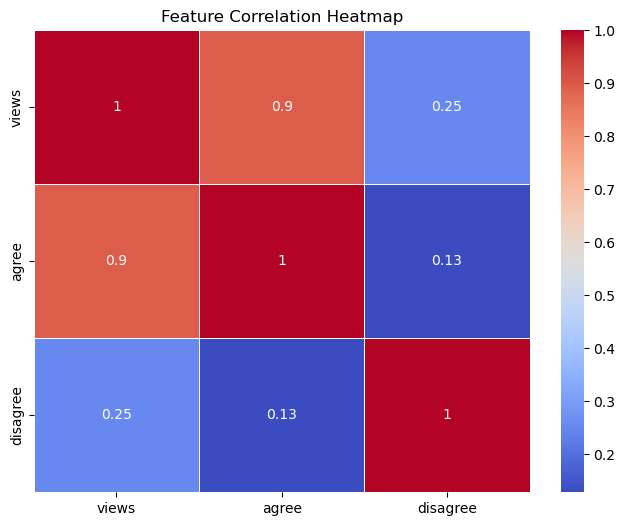

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'views', 'agree', 'disagree' 피처 간의 상관관계 계산
correlation_matrix = df[['views', 'agree', 'disagree']].corr()

# 상관관계 히트맵 출력
plt.figure(figsize=(8, 6)) # 히트맵 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

### 숫자형 데이터 표준화

In [39]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 조회수 데이터 스케일링
df['views'] = scaler.fit_transform(df[['views']])

In [40]:
# StandardScaler 객체 생성
scaler = StandardScaler()

# 조회수 데이터 스케일링
df['agree'] = scaler.fit_transform(df[['agree']])

In [41]:
# StandardScaler 객체 생성
scaler = StandardScaler()

# 조회수 데이터 스케일링
df['disagree'] = scaler.fit_transform(df[['disagree']])

### Visualization

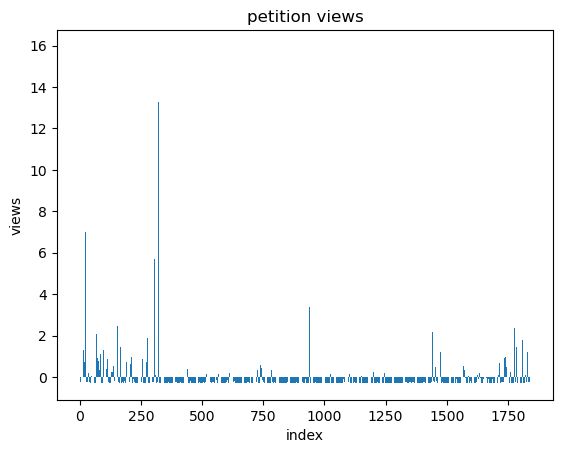

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 막대 그래프 그리기
plt.bar(df.index, df['views'])
plt.title('petition views')
plt.xlabel('index')
plt.ylabel('views')

plt.show()  # 그래프 보여주기

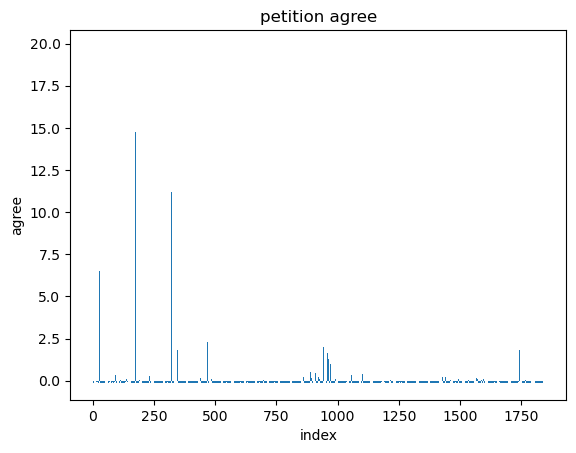

In [43]:
# 막대 그래프 그리기
plt.bar(df.index, df['agree'])
plt.title('petition agree')
plt.xlabel('index')
plt.ylabel('agree')

plt.show()  # 그래프 보여주기

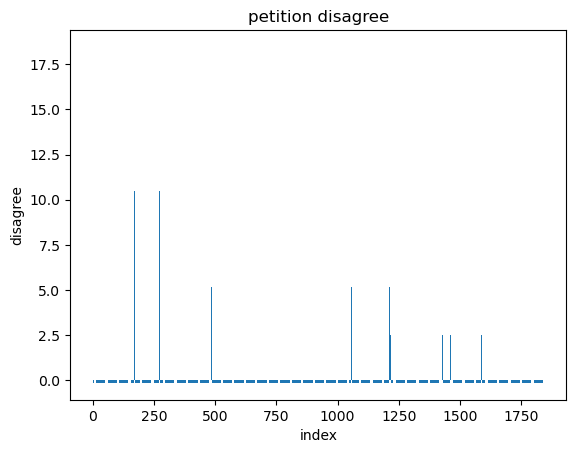

In [44]:
# 막대 그래프 그리기
plt.bar(df.index, df['disagree'])
plt.title('petition disagree')
plt.xlabel('index')
plt.ylabel('disagree')

plt.show()  # 그래프 보여주기

## 4. 모델 훈련

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt

In [46]:
# 필요한 피처 선택
df_c = df[['title', 'views', 'agree', 'disagree', 'category']]

In [47]:
# '카테고리' 열을 제외한 나머지를 특성 데이터(X)로, '카테고리' 열을 타겟 데이터(y)로 설정
X = df_c.drop('category', axis=1)
y = df_c['category']

In [48]:
# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,title,views,agree,disagree
588,기숙사 입사가 원래 확정되어있던 사람의 여름 계절 기숙사 입사를 요구합니다.,-0.284110,-0.129111,-0.13548
950,의과대학의 오프라인 강의를 반대합니다,-0.273511,-0.129111,-0.13548
1633,포트폴리오 사이트 건의합니다.,-0.284110,-0.129111,-0.13548
1564,관광객 통제 조치 결정에 대한 감사와 추가 요청,0.033862,-0.129111,-0.13548
1340,사이버캠퍼스 서버 개선을 요구합니다,-0.273511,-0.129111,-0.13548
...,...,...,...,...
1130,선택 입사 가능하도록 해주시길 바랍니다,-0.231115,-0.129111,-0.13548
1294,학기 전면 사이버 강의 대체,-0.284110,-0.129111,-0.13548
860,패스논패스 혹은 전과목 절대평가 도입 바랍니다.,-0.284110,-0.129111,-0.13548
1459,입학식 관련 교직원분들께,-0.273511,-0.129111,-0.13548


### 피처벡터화

In [49]:
from konlpy.tag import Okt

okt = Okt()
def tw_tokenizer(text):
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = okt.morphs(text)
    return tokens_ko

### LogisticRegression 모델을 이용한 평가

In [50]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(tokenizer=tw_tokenizer)),
    ('lr_clf', LogisticRegression(random_state=42))
])

In [51]:
# '제목' 컬럼과 '카테고리' 컬럼을 사용해야 합니다.
# X_train과 y_train을 앞서 분할한 데이터로 가정합니다.
# 실제 코드에 맞게 데이터를 조정해 주세요.

pipeline.fit(X_train['title'], y_train)

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf_vect',
                 TfidfVectorizer(tokenizer=<function tw_tokenizer at 0x12be3dc60>)),
                ('lr_clf', LogisticRegression(random_state=42))])

In [52]:
from sklearn.metrics import accuracy_score

# 테스트 데이터 세트를 이용한 예측
pred = pipeline.predict(X_test['title'])

# 정확도 평가
print('정확도:', accuracy_score(y_test, pred))

정확도: 0.7588075880758808


### 예측 결과 확인

In [53]:
pred

array(['학생지원 - 행사지원', '학생지원 - 행사지원', '행정지원 - 학교관련 제도', '기타',
       '행정지원 - 학사운영 전반에 관한 업무', '행정지원 - 학사운영 전반에 관한 업무', '대학',
       '행정지원 - 학사운영 전반에 관한 업무', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '대학', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '기타', '대학', '기타', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '기타', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '기타', '행정지원 - 학사운영 전반에 관한 업무', '기타',
       '행정지원 - 학사운영 전반에 관한 업무', '행정지원 - 학사운영 전반에 관한 업무', '기타',
       '행정지원 - 학사운영 전반에 관한 업무', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '기타', '대학', '행정지원 - 학교관련 제도',
       '행정지원 - 학사운영 전반에 관한 업무', '기타', '행정지원 - 학사운영 전반에 관한 업무',
       '행정지원 - 학사운영 전반에 관한 업무', '행정지원 - 학사운영 전반에 관한 업무', '기타', '대학', '기타',
 

In [54]:
import pandas as pd

# 예측 결과와 X_test['title']을 pandas DataFrame으로 결합
results_df = pd.DataFrame({'test_title': X_test['title'], 'Predicted': pred, 'Answer': y_test})

results_df

,test_title,Predicted,Answer
1559,왜 학위복 관련 건의만 선택적으로 답변하시나요 졸업식은 학위복만 입는 자리가 아닙니...,학생지원 - 행사지원,학생지원 - 행사지원
1501,졸업식 연기 부탁드립니다.,학생지원 - 행사지원,학생지원 - 행사지원
352,추가학기생 수강가능학점 학점 추가 요청합니다,행정지원 - 학교관련 제도,행정지원 - 학교관련 제도
1647,건의사항,기타,기타
1463,인터넨 강의 전환 시 조예대 등록금 감면 바랍니다.,행정지원 - 학사운영 전반에 관한 업무,대학
...,...,...,...
942,의과대학 월 일 오프라인 개강 및 이에 대한 본교의 승인 절차 진행에 반대합니다.,대학,대학
1574,년 월 졸업식을 취소가 아닌 연기로 진행해주세요.,학생지원 - 행사지원,학생지원 - 행사지원
1339,조형예술대학의 모든 실기수업 온라인강의 변환등록금 인하를 요구합니다,대학,대학
1780,기숙사 세탁보증금 환불이 진행되지 않고 있습니다.,행정지원 - 학사운영 전반에 관한 업무,생활지원 - 기숙사


In [55]:
results_df.to_csv("final_result.csv", index = False)